In [81]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
import requests
import time
import json
import string
from datetime import date
import scipy.stats as st
from scipy.stats import linregress 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#Notes: https://data.cdc.gov/Nutrition-Physical-Activity-and-Obesity/Nutrition-Physical-Activity-and-Obesity-Behavioral/hn4x-zwk7



In [3]:
#Import the API Key
data_df = pd.read_csv(r"Resources\Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System_20231101.csv")
#Add calculated number of obese people
data_df['calculated_num_obese'] = round(data_df['Sample_Size'] * data_df['Data_Value'] * .01)

In [23]:
list_of_categories = data_df['StratificationCategory1'].unique()
list_of_categories

array(['Race/Ethnicity', 'Education', 'Income', 'Age (years)', 'Gender',
       'Total', nan], dtype=object)

In [47]:
# Convert data into a Pandas DataFrame
data_df = data_df[['YearEnd','LocationAbbr','Question','Data_Value','Sample_Size','Race/Ethnicity','Education','Gender','StratificationCategory1','Stratification1']]

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88629 entries, 0 to 88628
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   YearEnd                  88629 non-null  int64  
 1   LocationAbbr             88629 non-null  object 
 2   Question                 88629 non-null  object 
 3   Data_Value               79851 non-null  float64
 4   Sample_Size              79851 non-null  float64
 5   Race/Ethnicity           25320 non-null  object 
 6   Education                12660 non-null  object 
 7   Gender                   6330 non-null   object 
 8   StratificationCategory1  88620 non-null  object 
 9   Stratification1          88620 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 6.8+ MB


In [25]:
#These are the questions this dataset answers
list_of_questions = data_df['Question'].unique()
print(sorted(list_of_questions))

['Percent of adults aged 18 years and older who have an overweight classification', 'Percent of adults aged 18 years and older who have obesity', 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)', 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week', 'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)', 'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week', 'Percent of adults who engage in no leisure-time physical activity', 'Percent of adults who report consuming fru

In [26]:
overweight_df = data_df[data_df['Question'] == 'Percent of adults aged 18 years and older who have an overweight classification']

In [27]:
obese_df = data_df[data_df['Question'] == 'Percent of adults aged 18 years and older who have obesity']

In [28]:
age_data_df = data_df.loc[:,['YearEnd','LocationAbbr','Question','Data_Value','Sample_Size','StratificationCategory1','Stratification1']]

age_data_df = age_data_df[age_data_df['YearEnd']==2020]
age_data_df = age_data_df[age_data_df['LocationAbbr']=='US']
age_data_df = age_data_df[age_data_df['StratificationCategory1']=='Age (years)']
age_data_df = age_data_df[age_data_df['Question']=='Percent of adults aged 18 years and older who have obesity']
age_data_df = age_data_df.sort_values(by='Stratification1', ascending=True)

age_data_df

,YearEnd,LocationAbbr,Question,Data_Value,Sample_Size,StratificationCategory1,Stratification1
8846,2020,US,Percent of adults aged 18 years and older who ...,19.5,22611.0,Age (years),18 - 24
7438,2020,US,Percent of adults aged 18 years and older who ...,30.9,38280.0,Age (years),25 - 34
7159,2020,US,Percent of adults aged 18 years and older who ...,35.5,44948.0,Age (years),35 - 44
8601,2020,US,Percent of adults aged 18 years and older who ...,38.1,52842.0,Age (years),45 - 54
10441,2020,US,Percent of adults aged 18 years and older who ...,36.3,69210.0,Age (years),55 - 64
6597,2020,US,Percent of adults aged 18 years and older who ...,29.3,125950.0,Age (years),65 or older


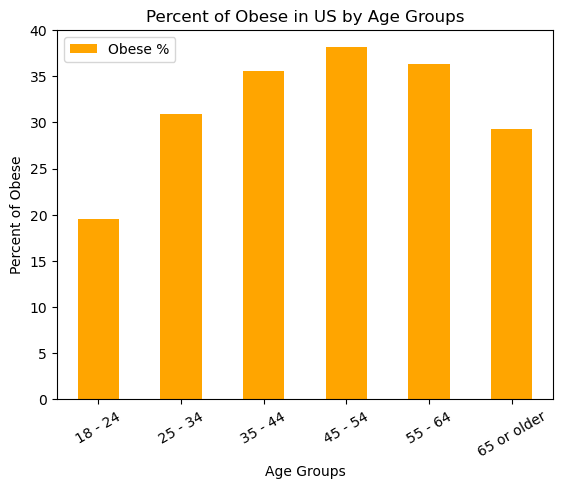

In [29]:
age_data_df.plot.bar(x='Stratification1', y='Data_Value', color='orange')

plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Percent of Obese in US by Age Groups")
plt.xlabel("Age Groups")
plt.ylabel("Percent of Obese")
plt.legend(['Obese %'], loc="upper left")
plt.show()

In [30]:
age_data_overweight_df = data_df.loc[:,['YearEnd','LocationAbbr','Question','Data_Value','Sample_Size','StratificationCategory1','Stratification1']]

age_data_overweight_df = age_data_overweight_df[age_data_overweight_df['YearEnd']==2020]
age_data_overweight_df = age_data_overweight_df[age_data_overweight_df['LocationAbbr']=='US']
age_data_overweight_df = age_data_overweight_df[age_data_overweight_df['StratificationCategory1']=='Age (years)']
age_data_overweight_df = age_data_overweight_df[age_data_overweight_df['Question']=='Percent of adults aged 18 years and older who have an overweight classification']
age_data_overweight_df = age_data_overweight_df.sort_values(by='Stratification1', ascending=True)

age_data_overweight_df

,YearEnd,LocationAbbr,Question,Data_Value,Sample_Size,StratificationCategory1,Stratification1
6868,2020,US,Percent of adults aged 18 years and older who ...,26.6,22611.0,Age (years),18 - 24
8143,2020,US,Percent of adults aged 18 years and older who ...,32.7,38280.0,Age (years),25 - 34
6673,2020,US,Percent of adults aged 18 years and older who ...,34.8,44948.0,Age (years),35 - 44
5650,2020,US,Percent of adults aged 18 years and older who ...,36.2,52842.0,Age (years),45 - 54
9686,2020,US,Percent of adults aged 18 years and older who ...,37.1,69210.0,Age (years),55 - 64
8413,2020,US,Percent of adults aged 18 years and older who ...,38.4,125950.0,Age (years),65 or older


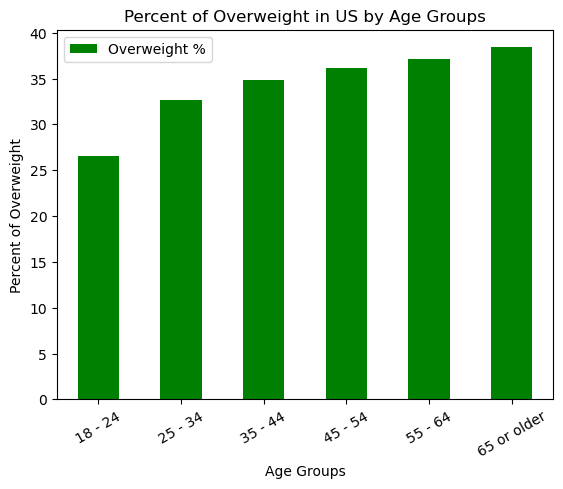

In [31]:
age_data_overweight_df.plot.bar(x='Stratification1', y='Data_Value', color='green')

plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Percent of Overweight in US by Age Groups")
plt.xlabel("Age Groups")
plt.ylabel("Percent of Overweight")
plt.legend(['Overweight %'], loc="upper left")
plt.show()

In [32]:
leisure_data_df = data_df.loc[:,['YearEnd','LocationAbbr','Question','Data_Value','Sample_Size','StratificationCategory1','Stratification1']]

leisure_data_df = leisure_data_df[leisure_data_df['YearEnd']==2020]
leisure_data_df = leisure_data_df[leisure_data_df['LocationAbbr']=='US']
leisure_data_df = leisure_data_df[leisure_data_df['StratificationCategory1']=='Income']
leisure_data_df = leisure_data_df[leisure_data_df['Question']== 'Percent of adults who engage in no leisure-time physical activity']
leisure_data_df = leisure_data_df.sort_values(by='Stratification1', ascending=True)
leisure_data_df = leisure_data_df.dropna()
leisure_data_df

,YearEnd,LocationAbbr,Question,Data_Value,Sample_Size,StratificationCategory1,Stratification1
6076,2020,US,Percent of adults who engage in no leisure-tim...,34.0,47033.0,Income,"$15,000 - $24,999"
10242,2020,US,Percent of adults who engage in no leisure-tim...,29.8,30688.0,Income,"$25,000 - $34,999"
9171,2020,US,Percent of adults who engage in no leisure-tim...,24.2,43184.0,Income,"$35,000 - $49,999"
7984,2020,US,Percent of adults who engage in no leisure-tim...,20.4,51926.0,Income,"$50,000 - $74,999"
9015,2020,US,Percent of adults who engage in no leisure-tim...,12.7,117926.0,Income,"$75,000 or greater"
9964,2020,US,Percent of adults who engage in no leisure-tim...,26.9,78514.0,Income,Data not reported
7603,2020,US,Percent of adults who engage in no leisure-tim...,40.1,24882.0,Income,"Less than $15,000"


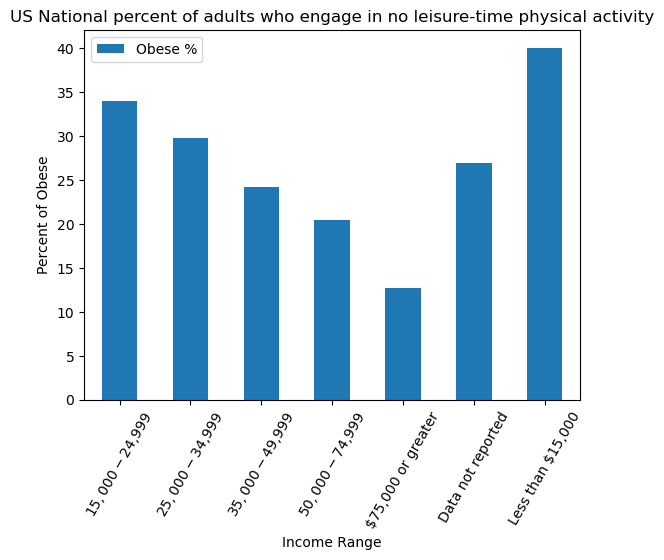

In [33]:
#Reorder the x-ticks
leisure_data_df.plot.bar(x='Stratification1', y='Data_Value')

plt.xticks(rotation=60, horizontalalignment="center")
plt.title("US National percent of adults who engage in no leisure-time physical activity")
plt.xlabel("Income Range")
plt.ylabel("Percent of Obese")
plt.legend(['Obese %'], loc="upper left")
plt.show()

In [34]:
obese_df = data_df.loc[:,['YearEnd','LocationAbbr','Question','Data_Value','Sample_Size','StratificationCategory1','Stratification1']]
obese_df = obese_df[obese_df['YearEnd'] == 2020]
obese_df = obese_df[obese_df['LocationAbbr'] != 'US']
obese_df = obese_df[obese_df['LocationAbbr'] != 'VI']
obese_df = obese_df[obese_df['LocationAbbr'] != 'GU']
obese_df = obese_df[obese_df['LocationAbbr'] != 'DC']
obese_df = obese_df[obese_df['LocationAbbr'] != 'PR']
obese_df = obese_df[obese_df['StratificationCategory1'] == 'Total']
obese_df = obese_df[obese_df['Question'] == 'Percent of adults aged 18 years and older who have obesity']

obese_df.head()

,YearEnd,LocationAbbr,Question,Data_Value,Sample_Size,StratificationCategory1,Stratification1
429,2020,AK,Percent of adults aged 18 years and older who ...,31.9,3335.0,Total,Total
5621,2020,MD,Percent of adults aged 18 years and older who ...,31.0,12562.0,Total,Total
5710,2020,VA,Percent of adults aged 18 years and older who ...,32.2,8568.0,Total,Total
5981,2020,OK,Percent of adults aged 18 years and older who ...,36.4,4530.0,Total,Total
6125,2020,FL,Percent of adults aged 18 years and older who ...,28.4,10591.0,Total,Total


In [35]:
#fig = px.choropleth(locations=obese_df['LocationAbbr'], locationmode="USA-states", color=obese_df['Data_Value'], scope="usa",color_continuous_scale='spectral_r')

fig = px.choropleth(obese_df,
                    locations= obese_df['LocationAbbr'],
                    color= obese_df['Data_Value'],
                    color_continuous_scale='spectral_r',
                    hover_name=obese_df['LocationAbbr'],
                    locationmode='USA-states',
                    #labels={'Current Unemployment Rate':'Unemployment Rate %'},
                    scope='usa')

fig.add_scattergeo(
    #locations=obese_df['LocationAbbr'],
    locationmode='USA-states',
    text=obese_df['LocationAbbr'],
    mode='text')

fig.update_layout(
    title={'text':'2020 Obesity Rates %',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})

fig.show()

In [36]:
list_of_questions = obese_df['StratificationCategory1'].unique()
print(sorted(list_of_questions))

['Total']


In [37]:
timeline_df = data_df.loc[:,['YearEnd','LocationAbbr','Question','Data_Value','Sample_Size','StratificationCategory1','Stratification1']]
#obese_df = obese_df[obese_df['YearEnd'] == 2020]
timeline_df = timeline_df[timeline_df['LocationAbbr'] == 'US']
timeline_df = timeline_df[timeline_df['StratificationCategory1'] == 'Total']
timeline_df = timeline_df[timeline_df['Question'] == 'Percent of adults aged 18 years and older who have obesity']
timeline_df = timeline_df.sort_values(by='YearEnd', ascending=True)

timeline_df

,YearEnd,LocationAbbr,Question,Data_Value,Sample_Size,StratificationCategory1,Stratification1
3149,2011,US,Percent of adults aged 18 years and older who ...,27.4,470700.0,Total,Total
10470,2012,US,Percent of adults aged 18 years and older who ...,27.7,442230.0,Total,Total
7611,2013,US,Percent of adults aged 18 years and older who ...,28.3,457487.0,Total,Total
1069,2014,US,Percent of adults aged 18 years and older who ...,28.9,425875.0,Total,Total
2487,2015,US,Percent of adults aged 18 years and older who ...,28.9,398316.0,Total,Total
78790,2016,US,Percent of adults aged 18 years and older who ...,29.6,438479.0,Total,Total
14524,2017,US,Percent of adults aged 18 years and older who ...,30.1,408448.0,Total,Total
4405,2018,US,Percent of adults aged 18 years and older who ...,30.9,396022.0,Total,Total
49654,2019,US,Percent of adults aged 18 years and older who ...,31.4,374073.0,Total,Total
9355,2020,US,Percent of adults aged 18 years and older who ...,31.9,353841.0,Total,Total


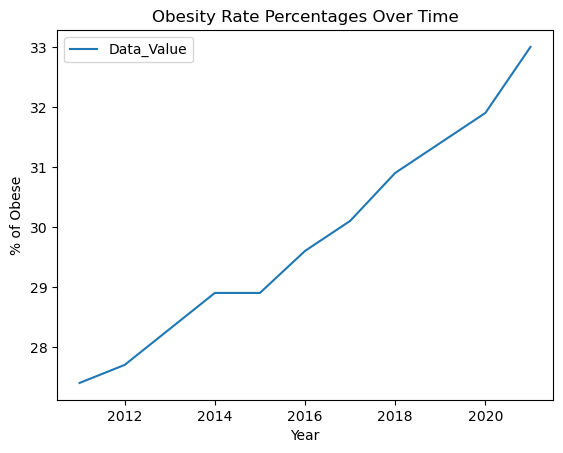

In [38]:
#timeline_df.plot.line(x = timeline_df['YearEnd'], y = timeline_df['Data_Value'])
lines = timeline_df.plot.line(x='YearEnd', y='Data_Value')
plt.title("Obesity Rate Percentages Over Time")
plt.xlabel("Year")
plt.ylabel("% of Obese")

plt.show()

In [74]:
fruit_veggie_df = data_df.loc[:,['YearEnd','LocationAbbr','Question','Data_Value','Sample_Size','StratificationCategory1','Stratification1']]
fruit_veggie_df = fruit_veggie_df[fruit_veggie_df['YearEnd'] == 2021]
fruit_veggie_df = fruit_veggie_df[fruit_veggie_df['LocationAbbr'] != 'US']
fruit_veggie_df = fruit_veggie_df[fruit_veggie_df['StratificationCategory1'] == 'Race/Ethnicity']
fruit_veggie_df = fruit_veggie_df.sort_values(by='LocationAbbr', ascending=True)

fruit_df = fruit_veggie_df[fruit_veggie_df['Question'] =='Percent of adults who report consuming fruit less than one time daily']
veggie_df = fruit_veggie_df[fruit_veggie_df['Question'] == 'Percent of adults who report consuming fruit less than one time daily']

#Use fruit_df and veggie_df for the plot

,YearEnd,LocationAbbr,Question,Data_Value,Sample_Size,StratificationCategory1,Stratification1
81766,2021,AK,Percent of adults who report consuming fruit l...,51.1,522.0,Race/Ethnicity,American Indian/Alaska Native
85823,2021,AK,Percent of adults who report consuming fruit l...,53.4,103.0,Race/Ethnicity,Asian
81601,2021,AK,Percent of adults who report consuming fruit l...,40.2,3459.0,Race/Ethnicity,Non-Hispanic White
86377,2021,AK,Percent of adults who report consuming fruit l...,21.9,72.0,Race/Ethnicity,Other
82255,2021,AK,Percent of adults who report consuming fruit l...,35.4,81.0,Race/Ethnicity,Non-Hispanic Black
...,...,...,...,...,...,...,...
86872,2021,WY,Percent of adults who report consuming fruit l...,NaN,NaN,Race/Ethnicity,Asian
84800,2021,WY,Percent of adults who report consuming fruit l...,49.6,176.0,Race/Ethnicity,Hispanic
86242,2021,WY,Percent of adults who report consuming fruit l...,53.9,57.0,Race/Ethnicity,2 or more races
84648,2021,WY,Percent of adults who report consuming fruit l...,NaN,NaN,Race/Ethnicity,American Indian/Alaska Native


In [81]:
#Gender over time dataframe
gender_df = data_df.loc[:,['YearEnd','LocationAbbr','Question','Data_Value','Sample_Size','StratificationCategory1','Stratification1']]
#gender_df = gender_df[gender_df['YearEnd'] == 2020]
gender_df = gender_df[gender_df['Question']=='Percent of adults aged 18 years and older who have obesity']
gender_df = gender_df[gender_df['LocationAbbr'] == 'US']
gender_df = gender_df[gender_df['StratificationCategory1'] == 'Gender']
gender_df = gender_df.sort_values(by='YearEnd', ascending=True)

male_gender_df = gender_df[gender_df['Stratification1'] == 'Male']
female_gender_df = gender_df[gender_df['Stratification1'] == 'Female']


,YearEnd,LocationAbbr,Question,Data_Value,Sample_Size,StratificationCategory1,Stratification1
15904,2011,US,Percent of adults aged 18 years and older who ...,27.1,278712.0,Gender,Female
9368,2012,US,Percent of adults aged 18 years and older who ...,27.4,257190.0,Gender,Female
2841,2013,US,Percent of adults aged 18 years and older who ...,28.3,263276.0,Gender,Female
10015,2014,US,Percent of adults aged 18 years and older who ...,28.8,242169.0,Gender,Female
9548,2015,US,Percent of adults aged 18 years and older who ...,28.6,221909.0,Gender,Female
78558,2016,US,Percent of adults aged 18 years and older who ...,29.5,240000.0,Gender,Female
35405,2017,US,Percent of adults aged 18 years and older who ...,30.0,220608.0,Gender,Female
4234,2018,US,Percent of adults aged 18 years and older who ...,31.3,209072.0,Gender,Female
41420,2019,US,Percent of adults aged 18 years and older who ...,32.1,197450.0,Gender,Female
9187,2020,US,Percent of adults aged 18 years and older who ...,32.1,184399.0,Gender,Female


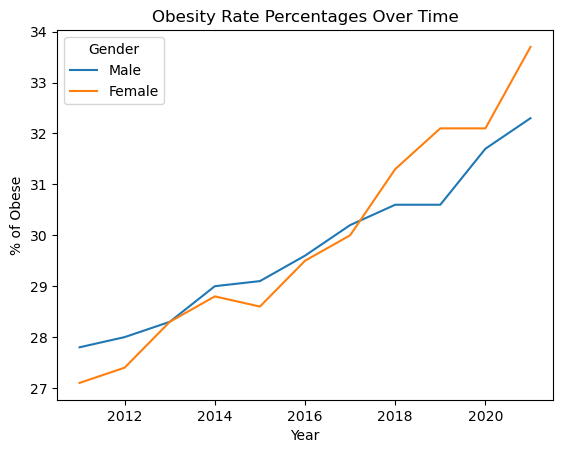

In [96]:
#Gender over time
plt.title("Obesity Rate Percentages Over Time")
plt.xlabel("Year")
plt.ylabel("% of Obese")

plt.plot(male_gender_df['YearEnd'],male_gender_df['Data_Value'])
plt.plot(female_gender_df['YearEnd'],female_gender_df['Data_Value'])

plt.legend(['Male', 'Female'], loc='upper left', title='Gender')
plt.show()

In [15]:
fruit_veggie_df = data_df.loc[:,['YearEnd','LocationAbbr','Question','Data_Value','Sample_Size','StratificationCategory1','Stratification1']]
fruit_veggie_df = fruit_veggie_df[fruit_veggie_df['YearEnd'] == 2021]
fruit_veggie_df = fruit_veggie_df[fruit_veggie_df['LocationAbbr'] != 'US']
fruit_veggie_df = fruit_veggie_df[fruit_veggie_df['StratificationCategory1'] == 'Race/Ethnicity']
fruit_veggie_df = fruit_veggie_df.sort_values(by='LocationAbbr', ascending=True)

fruit_df = fruit_veggie_df[fruit_veggie_df['Question'] =='Percent of adults who report consuming fruit less than one time daily']
veggie_df = fruit_veggie_df[fruit_veggie_df['Question'] == 'Percent of adults who report consuming vegetables less than one time daily']

#Use fruit_df and veggie_df for the plot

,YearEnd,LocationAbbr,Question,Data_Value,Sample_Size,StratificationCategory1,Stratification1
82683,2021,AK,Percent of adults who report consuming vegetab...,26.7,489.0,Race/Ethnicity,American Indian/Alaska Native
86597,2021,AK,Percent of adults who report consuming vegetab...,16.4,3362.0,Race/Ethnicity,Non-Hispanic White
88266,2021,AK,Percent of adults who report consuming vegetab...,NaN,NaN,Race/Ethnicity,Hawaiian/Pacific Islander
84207,2021,AK,Percent of adults who report consuming vegetab...,16.6,158.0,Race/Ethnicity,Hispanic
84327,2021,AK,Percent of adults who report consuming vegetab...,17.2,79.0,Race/Ethnicity,Non-Hispanic Black
...,...,...,...,...,...,...,...
83286,2021,WY,Percent of adults who report consuming vegetab...,18.1,3425.0,Race/Ethnicity,Non-Hispanic White
81438,2021,WY,Percent of adults who report consuming vegetab...,NaN,NaN,Race/Ethnicity,Asian
84970,2021,WY,Percent of adults who report consuming vegetab...,NaN,NaN,Race/Ethnicity,American Indian/Alaska Native
83700,2021,WY,Percent of adults who report consuming vegetab...,21.0,175.0,Race/Ethnicity,Hispanic


In [91]:
fruit_merged_veggie = pd.merge(fruit_df, veggie_df, on=["LocationAbbr", "Stratification1"])
fruit_merged_veggie.rename(columns={'YearEnd_x': 'YearEnd', 'Data_Value_x': 'Data_Value_fruit','Data_Value_y': 'Data_Value_veggie'}, inplace=True)
fruit_merged_veggie = fruit_merged_veggie[fruit_merged_veggie['Data_Value_fruit'].notna()]
fruit_merged_veggie = fruit_merged_veggie[fruit_merged_veggie['Data_Value_veggie'].notna()]

fruit_merged_veggie

,YearEnd,LocationAbbr,Question_x,Data_Value_fruit,Sample_Size_x,StratificationCategory1_x,Stratification1,YearEnd_y,Question_y,Data_Value_veggie,Sample_Size_y,StratificationCategory1_y
0,2021,AK,Percent of adults who report consuming fruit l...,51.1,522.0,Race/Ethnicity,American Indian/Alaska Native,2021,Percent of adults who report consuming vegetab...,26.7,489.0,Race/Ethnicity
1,2021,AK,Percent of adults who report consuming fruit l...,53.4,103.0,Race/Ethnicity,Asian,2021,Percent of adults who report consuming vegetab...,27.5,98.0,Race/Ethnicity
2,2021,AK,Percent of adults who report consuming fruit l...,40.2,3459.0,Race/Ethnicity,Non-Hispanic White,2021,Percent of adults who report consuming vegetab...,16.4,3362.0,Race/Ethnicity
3,2021,AK,Percent of adults who report consuming fruit l...,21.9,72.0,Race/Ethnicity,Other,2021,Percent of adults who report consuming vegetab...,18.9,69.0,Race/Ethnicity
4,2021,AK,Percent of adults who report consuming fruit l...,35.4,81.0,Race/Ethnicity,Non-Hispanic Black,2021,Percent of adults who report consuming vegetab...,17.2,79.0,Race/Ethnicity
...,...,...,...,...,...,...,...,...,...,...,...,...
421,2021,WV,Percent of adults who report consuming fruit l...,50.1,91.0,Race/Ethnicity,2 or more races,2021,Percent of adults who report consuming vegetab...,13.8,92.0,Race/Ethnicity
422,2021,WV,Percent of adults who report consuming fruit l...,46.1,5660.0,Race/Ethnicity,Non-Hispanic White,2021,Percent of adults who report consuming vegetab...,18.8,5576.0,Race/Ethnicity
424,2021,WY,Percent of adults who report consuming fruit l...,42.5,3481.0,Race/Ethnicity,Non-Hispanic White,2021,Percent of adults who report consuming vegetab...,18.1,3425.0,Race/Ethnicity
428,2021,WY,Percent of adults who report consuming fruit l...,49.6,176.0,Race/Ethnicity,Hispanic,2021,Percent of adults who report consuming vegetab...,21.0,175.0,Race/Ethnicity


y = 0.05x + 19.87
The r-squared is: 0.001787456938530391


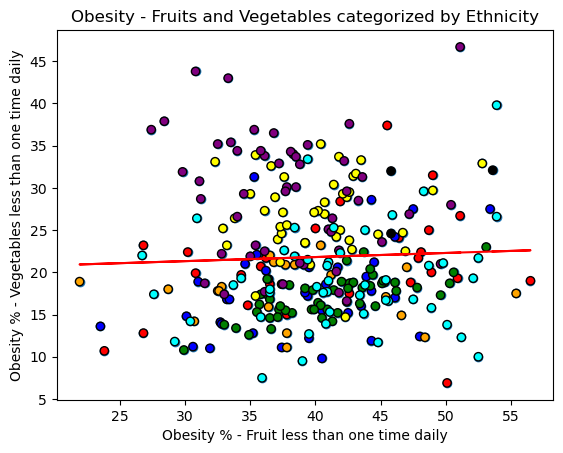

In [110]:
# Build dataframe for colored chart. Show color plot
#linear regression
x_values = fv_color_merged['Data_Value_fruit']
y_values = fv_color_merged['Data_Value_veggie']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1,1),fontsize=15,color="red")

###################################################################
list_of_ethnic = fruit_merged_veggie['Stratification1'].unique()
color_df = pd.DataFrame({'Stratification1':list_of_ethnic,
                         'Color':['red','blue','green','orange','yellow','purple','cyan','black']})  

fv_color_merged = pd.merge(fruit_merged_veggie, color_df, on=["Stratification1"])

fv_color_merged.dropna()

labels = list_of_ethnic

plt.scatter(fv_color_merged['Data_Value_fruit'], fv_color_merged['Data_Value_veggie'], marker="o", facecolors=fv_color_merged['Color'], edgecolors="black", label=labels)
plt.xlabel("Obesity % - Fruit less than one time daily")
plt.ylabel("Obesity % - Vegetables less than one time daily")
plt.title("Obesity - Fruits and Vegetables categorized by Ethnicity")

print(line_eq)
print(f"The r-squared is: {rvalue**2}")
plt.show()


In [106]:
# Add the linear regression equation and line to plot

#plt.xlabel('Rooms in House')
#plt.ylabel('Median House Prices ($100,000)')
#plt.show()

